In [28]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
import datetime
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # windows
# matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 꺠지지않게 해줌

In [29]:
df = pd.read_csv('./datasets/강남.csv')
df

,자치구,계약일,건물면적(㎡),층,KOSPI종가,Fed기준금리,국제유가(Dubai)($/배럴),부동산거래량,국고채5년(평균),국고채10년(평균),...,BOK기준금리,건물연식,GDP대비가계부채비율,환율종가,선행지수순환변동치,EPU,장단기금리spread,금값종가,LTV,물건금액(만원)
0,강남구,2016-01-01,50.67,4,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,34,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,87000
1,송파구,2016-01-01,84.93,11,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,21,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,46450
2,서초구,2016-01-01,134.36,12,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,11,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,94000
3,용산구,2016-01-02,114.48,7,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,15,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,62500
4,강남구,2016-01-02,110.39,6,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,27,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,133000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100346,서초구,2022-12-31,84.98,23,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,16,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,194000
100347,강남구,2022-12-31,76.79,2,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,43,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,184000
100348,서초구,2022-12-31,152.33,9,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,18,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,250000
100349,송파구,2022-12-31,84.71,11,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,34,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.2,138000


In [30]:
# 원하는 컬럼 선택
df = df[['자치구','계약일','건물면적(㎡)', '층', 'Fed기준금리','건물연식', 'GDP대비가계부채비율','EPU', '장단기금리spread','LTV', '물건금액(만원)']]

In [31]:
# Train : 2016-2020
# Test : 2021-2022

df['계약일'] = pd.to_datetime(df['계약일'])
train_df = df.loc[df['계약일'] < '2021']
test_df = df.loc[df['계약일'] >= '2021']

In [32]:
# Train Split
# feature & target  split

X_train_df = train_df.drop('물건금액(만원)', axis=1)
y = train_df['물건금액(만원)']

# X_train : 숫자형 컬럼만 
X_train = X_train_df.select_dtypes([np.number])

In [33]:
# Test Split
# feature & target  split

X_test_df = test_df.drop('물건금액(만원)', axis=1)
y_test = test_df['물건금액(만원)']

# X_test : 숫자형 컬럼만 
X_test = X_test_df.select_dtypes([np.number])

In [34]:
# minMax
from sklearn.preprocessing import MinMaxScaler

# Scaler 객체 생성
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [35]:
# y -> log 변환

# Train
y_scaled = np.log10(y)
# y_scaled

# Test
y_test_scaled = np.log10(y_test)
y_test_scaled

85340     5.079181
85341     5.245513
85342     5.439333
85343     5.250420
85344     5.110590
            ...   
100346    5.287802
100347    5.264818
100348    5.397940
100349    5.139879
100350    5.235528
Name: 물건금액(만원), Length: 15011, dtype: float64

## OLS 확인

In [36]:
# OLS 확인
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                 1.268e+04
Date:                Fri, 30 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:38:53   Log-Likelihood:                 31549.
No. Observations:               85340   AIC:                        -6.308e+04
Df Residuals:                   85331   BIC:                        -6.300e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.7330      0.006    851.548      0.000       4.722       4.744
건물면적(㎡)         1.5365      0.006    255.375      0.000       1.525       1.548
층               0.2946      0.006     49.646      0.000       0.283       0.306
Fed기준금리        -0.0502      0.003    -17.462      0.000      -0.056      -0.045
건물연식            0.1313      0.003     48.182      0.000       0.126       0.137
GDP대비가계부채비율     0.0558      0.005     10.343      0.000       0.045       0.066
EPU            -0.0152      0.003     -4.437      0.000      -0.022      -0.008
장단기금리spread     0.0233      0.003      7.848      0.000       0.017       0.029
LTV            -0.2049      0.004    -53.004      0.000      -0.213      -0.197
==============================================================================
Omnibus:                     1594.053   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1684.312
Skew:                          -0.343   Prob(JB):                         0.00
Kurtosis:                       3.060   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## VIF 확인

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_XbyVIF(X_scaled):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_scaled.values,i)
                         for i in range(X_scaled.shape[1])]
    vif["Feature"] = X_scaled.columns
    return vif

In [38]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor      Feature
0    4.885777      건물면적(㎡)
1    3.760906            층
2    3.312640      Fed기준금리
3    4.220635         건물연식
4    6.548296  GDP대비가계부채비율
5    3.604887          EPU
6    8.794908  장단기금리spread
7    6.941475          LTV


# LinearRegression

## CV - R2, MSE

In [39]:
# X_test 컬럼 -> X_scaled 기준(train)으로 맞추기  
X_test_scaled=X_test_scaled[X_scaled.columns]

## 교차검증

In [40]:
# CV 

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# 교차 검증을 통해 모델 평가 및 추정기 반환
cv_results = cross_validate(model, X_scaled, y_scaled, 
                            scoring= ('r2', 'neg_mean_squared_error'),cv=5, 
                            return_train_score=True, return_estimator=True)

train_scores_r2 = cv_results['train_r2']  # 훈련 점수
test_scores_r2 = cv_results['test_r2']    # 검증 점수
train_scores_mse = -cv_results['train_neg_mean_squared_error']
test_scores_mse = -cv_results['test_neg_mean_squared_error'] 

Validation_R2_score_mean = 0
Validation_MSE_mean = 0

# 훈련 점수와 검증 점수 출력
for i in range(len(train_scores_r2)):
   print(f"Fold {i+1}: Train Score_r2 = {np.round(train_scores_r2[i],5)},\
           Validation Score_r2 = {np.round(test_scores_r2[i],5)}")
   print(f"      Train Score_mse = {np.round(train_scores_mse[i],5)},\
           Validation Score_mse = {np.round(test_scores_mse[i],5)}")
   print('\n')
       # 마지막 평균 반환용
   Validation_R2_score_mean += test_scores_r2[i]
   Validation_MSE_mean += test_scores_mse[i]


print(f'CV 평균 R2 : {np.round(Validation_R2_score_mean/5,4)}')
print(f'CV 평균 MSE : {np.round(Validation_MSE_mean/5,4)}')

Fold 1: Train Score_r2 = 0.52503,           Validation Score_r2 = 0.50017
      Train Score_mse = 0.02909,           Validation Score_mse = 0.02371


Fold 2: Train Score_r2 = 0.54244,           Validation Score_r2 = 0.46936
      Train Score_mse = 0.02853,           Validation Score_mse = 0.02623


Fold 3: Train Score_r2 = 0.56511,           Validation Score_r2 = 0.38399
      Train Score_mse = 0.02737,           Validation Score_mse = 0.03335


Fold 4: Train Score_r2 = 0.56319,           Validation Score_r2 = 0.39013
      Train Score_mse = 0.02606,           Validation Score_mse = 0.03636


Fold 5: Train Score_r2 = 0.52116,           Validation Score_r2 = 0.42352
      Train Score_mse = 0.02757,           Validation Score_mse = 0.03478


CV 평균 R2 : 0.4334
CV 평균 MSE : 0.0309


## 평가지표 train and test 시각화

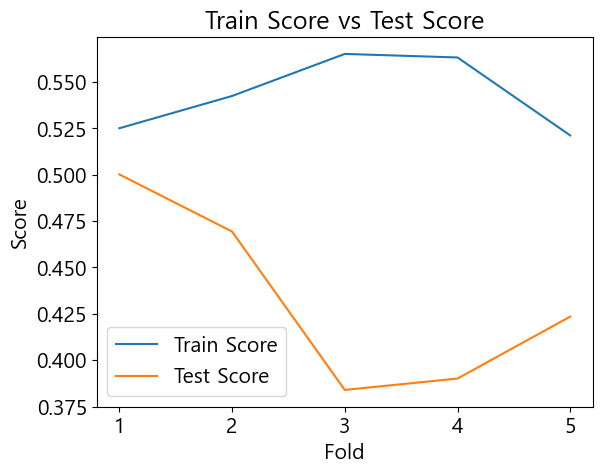

In [41]:
# R2
import matplotlib.pyplot as plt

train_scores = cv_results['train_r2']
test_scores = cv_results['test_r2']

# Fold 번호를 x축으로 설정하여 train_score와 test_score를 그래프로 출력
fold_numbers = range(1, len(train_scores) + 1)

plt.plot(fold_numbers, train_scores, label='Train Score')
plt.plot(fold_numbers, test_scores, label='Test Score')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Train Score vs Test Score')
plt.legend()
plt.show()

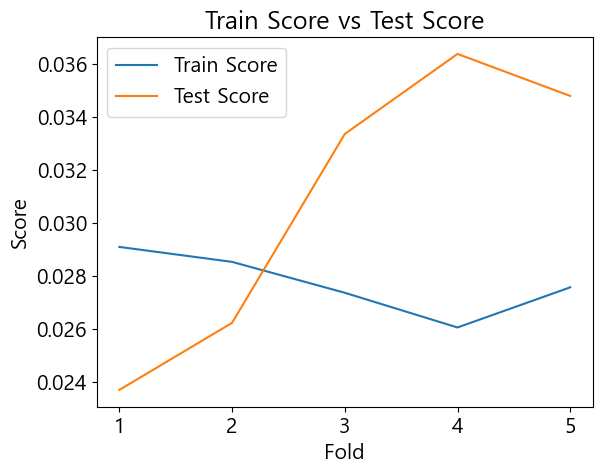

In [42]:
# MSE 
import matplotlib.pyplot as plt

train_scores = -cv_results['train_neg_mean_squared_error']
test_scores = -cv_results['test_neg_mean_squared_error']

# Fold 번호를 x축으로 설정하여 train_score와 test_score를 그래프로 출력
fold_numbers = range(1, len(train_scores) + 1)

plt.plot(fold_numbers, train_scores, label='Train Score')
plt.plot(fold_numbers, test_scores, label='Test Score')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Train Score vs Test Score')
plt.legend()
plt.show()

## Model 확정
- R2 그래프상 train & test 점수차이가 가장 적게 나는 모델 확정
- 최종 첫 번째로 확정

In [43]:
# 최종 모델 - Predict & 평가지표

y_pred = cv_results['estimator'][0].predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)
print('MSE : {0:.3f}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
print('\n')

MSE : 0.044, RMSE :  0.211, MAE: 0.211
Variance score :  0.648




In [44]:
# test 계수 결과 DF 

test_result = pd.DataFrame(data= cv_results['estimator'][0].coef_, index = X_scaled.columns)

test_result.columns = ['회귀계수']

test_result.sort_values('회귀계수', ascending=False)

,회귀계수
건물면적(㎡),1.512462
층,0.296454
건물연식,0.133591
GDP대비가계부채비율,0.017300
장단기금리spread,0.014866
EPU,-0.016042
Fed기준금리,-0.069810
LTV,-0.221760


# Ridge & Lasso

## Ridge

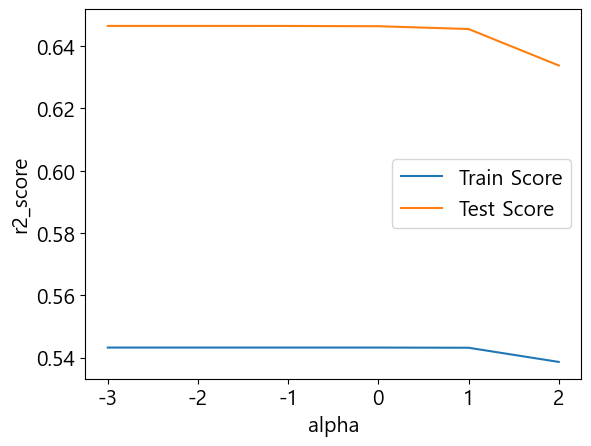

In [45]:
# Ridge
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_scaled, y_scaled)

import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_scaled, y_scaled)
    train_score.append(ridge.score(X_scaled, y_scaled))
    test_score.append(ridge.score(X_test_scaled, y_test_scaled))

plt.plot(np.log10(alpha_list), train_score, label='Train Score')
plt.plot(np.log10(alpha_list), test_score, label='Test Score')
plt.xlabel('alpha')
plt.ylabel('r2_score')
plt.legend()
plt.show()

- 기본값 alpha = 1.0으로 진행(alpha = 100은 너무 규제를 심하게 주는 것이라 생각해서)

# CV

In [46]:
# CV 

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

ridge = Ridge()
ridge.fit(X_scaled, y_scaled)
# 교차 검증을 통해 모델 평가 및 추정기 반환
cv_results = cross_validate(ridge, X_scaled, y_scaled, 
                            scoring= ('r2', 'neg_mean_squared_error'),cv=5, 
                            return_train_score=True, return_estimator=True)

train_scores_r2 = cv_results['train_r2']  # 훈련 점수
test_scores_r2 = cv_results['test_r2']    # 검증 점수
train_scores_mse = -cv_results['train_neg_mean_squared_error']
test_scores_mse = -cv_results['test_neg_mean_squared_error'] 

Validation_R2_score_mean = 0
Validation_MSE_mean = 0

# 훈련 점수와 검증 점수 출력
for i in range(len(train_scores_r2)):
   print(f"Fold {i+1}: Train Score_r2 = {np.round(train_scores_r2[i],5)},\
           Validation Score_r2 = {np.round(test_scores_r2[i],5)}")
   print(f"      Train Score_mse = {np.round(train_scores_mse[i],5)},\
           Validation Score_mse = {np.round(test_scores_mse[i],5)}")
   print('\n')
       # 마지막 평균 반환용
   Validation_R2_score_mean += test_scores_r2[i]
   Validation_MSE_mean += test_scores_mse[i]


print(f'CV 평균 R2 : {np.round(Validation_R2_score_mean/5,4)}')
print(f'CV 평균 MSE : {np.round(Validation_MSE_mean/5,4)}')

Fold 1: Train Score_r2 = 0.52503,           Validation Score_r2 = 0.50007
      Train Score_mse = 0.02909,           Validation Score_mse = 0.02371


Fold 2: Train Score_r2 = 0.54243,           Validation Score_r2 = 0.46928
      Train Score_mse = 0.02853,           Validation Score_mse = 0.02624


Fold 3: Train Score_r2 = 0.56511,           Validation Score_r2 = 0.38406
      Train Score_mse = 0.02737,           Validation Score_mse = 0.03334


Fold 4: Train Score_r2 = 0.56319,           Validation Score_r2 = 0.3901
      Train Score_mse = 0.02606,           Validation Score_mse = 0.03636


Fold 5: Train Score_r2 = 0.52116,           Validation Score_r2 = 0.42322
      Train Score_mse = 0.02757,           Validation Score_mse = 0.0348


CV 평균 R2 : 0.4333
CV 평균 MSE : 0.0309


## 평가지표 train and test 차이 시각화

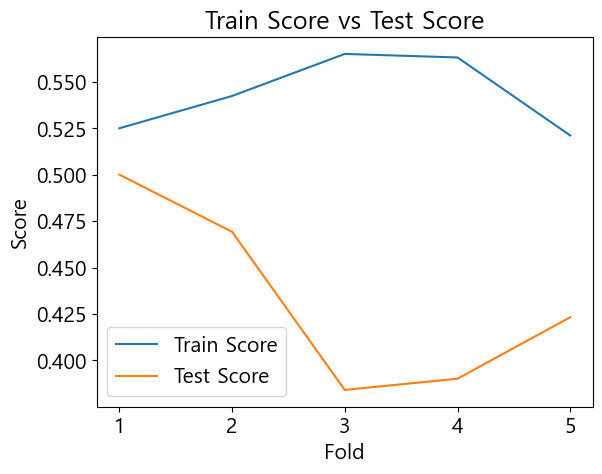

In [47]:
import matplotlib.pyplot as plt

train_scores = cv_results['train_r2']
test_scores = cv_results['test_r2']

# Fold 번호를 x축으로 설정하여 train_score와 test_score를 그래프로 출력
fold_numbers = range(1, len(train_scores) + 1)

plt.plot(fold_numbers, train_scores, label='Train Score')
plt.plot(fold_numbers, test_scores, label='Test Score')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Train Score vs Test Score')
plt.legend()
plt.show()

In [48]:
# ridge의 train, test r2 확인
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_scaled, y_scaled)
print(ridge.score(X_scaled, y_scaled))
print(ridge.score(X_test_scaled, y_test_scaled))

0.543200936562203
0.6464041497486961


In [49]:
# 최종 모델 - Predict & 평가지표
# Train 전체로 학습 시
ridge.fit(X_scaled, y_scaled)
y_pred = ridge.predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)
print('MSE : {0:.3f}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
print('\n')

MSE : 0.045, RMSE :  0.211, MAE: 0.211
Variance score :  0.646




In [50]:
# 최종 모델 - Predict & 평가지표

y_pred = cv_results['estimator'][0].predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)
print('MSE : {0:.3f}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
print('\n')

MSE : 0.045, RMSE :  0.211, MAE: 0.211
Variance score :  0.648




In [51]:
# Ridge 회귀계수
ridge_df = pd.DataFrame(data = cv_results['estimator'][0].coef_, index = X_scaled.columns)
ridge_df.columns = ['회귀계수']
ridge_df.sort_values(by = '회귀계수',ascending=False)

,회귀계수
건물면적(㎡),1.510111
층,0.296162
건물연식,0.133507
GDP대비가계부채비율,0.017181
장단기금리spread,0.014923
EPU,-0.016029
Fed기준금리,-0.069830
LTV,-0.221852


In [24]:
# Lasso 
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_scaled, y_scaled)
print(lasso.score(X_scaled, y_scaled))
print(lasso.score(X_test_scaled, y_test_scaled))

0.0
-0.1683033216951888


In [25]:
lasso.coef_ == 0

array([ True,  True,  True,  True,  True,  True,  True,  True])

___

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [27]:
X_train = train_df.iloc[ :, 2 : -1]  
y_train = train_df.iloc[ :, -1]

In [28]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
y_train = np.log10(y_train)

# RandomForest

In [29]:
# 랜덤 포레스트 회귀 모델 초기화
model = RandomForestRegressor(random_state =1 , n_jobs = -1)

# 모델 학습
model.fit(X_train, y_train)


# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))
print('Test set r2_score :', model.score(X_test_scaled, y_test_scaled))

Test set MSE: 0.018985410913819875
Test set RMSE: 0.13778755718068258
Test set r2_score : 0.8498279416077112


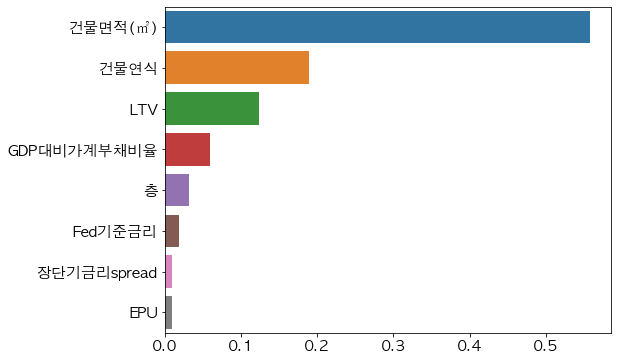

In [30]:
# test_df
importance = model.feature_importances_
# 상위 20개 변수 추출
top_features = pd.Series(importance, index=test_df.iloc[:,2:-1].columns).nlargest(20)
top = top_features.sort_values(ascending=False)[:20]
# 변수 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=top, y=top.index)
plt.show()

# DecisionTree

In [31]:
# 랜덤 포레스트 회귀 모델 초기화
model = DecisionTreeRegressor(random_state =1)

# 모델 학습
model.fit(X_train, y_train)

# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))
print('Test set r2_score :', model.score(X_test_scaled, y_test_scaled))

Test set MSE: 0.02761920147491072
Test set RMSE: 0.1661902568591514
Test set r2_score : 0.7815358142383143


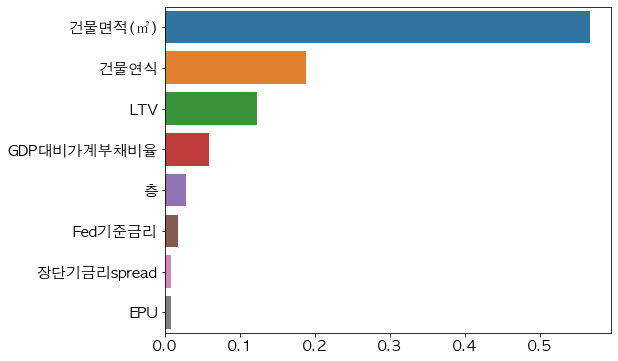

In [32]:
# test_df
importance = model.feature_importances_
# 상위 20개 변수 추출
top_features = pd.Series(importance, index=test_df.iloc[:,2:-1].columns).nlargest(20)
top = top_features.sort_values(ascending=False)[:20]
# 변수 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=top, y=top.index)
plt.show()

# XGBoost

In [33]:
import xgboost as xgb
# 랜덤 포레스트 회귀 모델 초기화
model = xgb.XGBRegressor(random_state =1)

# 모델 학습
model.fit(X_train, y_train)

# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))
print('Test set r2_score :', model.score(X_test_scaled, y_test_scaled))

Test set MSE: 0.01537580189981207
Test set RMSE: 0.12399920120634676
Test set r2_score : 0.8783794656218865


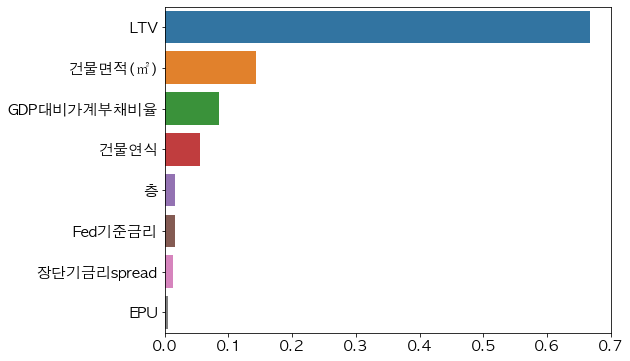

In [34]:
# test_df
importance = model.feature_importances_
# 상위 20개 변수 추출
top_features = pd.Series(importance, index=test_df.iloc[:,2:-1].columns).nlargest(20)
top = top_features.sort_values(ascending=False)[:20]
# 변수 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=top, y=top.index)
plt.show()